<center> <h1>Incidencia del Nivel de Escolaridad Sobre el Salario de la Población Económicamente Activa Ocupada del Área Urbana en la Ciudad de Yopal Casanare</h1> </center>

## Resumen 

Este trabajo estudia la relación que tiene el nivel de escolaridad sobre el nivel de salarios de la población económicamente activa (PEA) en condición ocupada de Yopal Casanare. Los datos utilizados para el análisis se obtuvieron a través de encuestas dirigidas a la población trabajadora de la zona urbana entre noviembre y diciembre del año 2021. La metodología econométrica incluye la estimación por Mínimos cuadrados ordinarios (MCO) calculada con errores estándares robustos, donde se propone que el nivel educativo incide sobre los salarios de los trabajadores. Se logra determinar que, el nivel educativo es estadísticamente significativo en los salarios de la PEA, en donde, la edad y la experiencia influyen, pero, en menor medida sobre el nivel de ingreso, adicionalmente a esto, existe discriminación salarial por género.<br><br>
**Palabras claves: Grado de escolaridad, nivel de salarios, población económicamente activa (PEA) y econometría.**

## Resumen variables

<center>

|Variables  | Nombre  | Tipos de variables |
|:------:|:---:|:-------:|
| Nivel de salario mensual<br>(Logaritmo del ingreso<br> en pesos colombianos)|<center>  Y  | Continua nominal |
|Nivel de escolaridad:<br> Primaria y Bachillerato<br>Técnico y Tecnólogo<br> Pregrado y posgrado    |<center> X1<br><center>X2<br><center>X3<br>  | Categórica ordinal |
|Años de experiencia   | <center>Z  | Continua nominal |
|Canal de búsqueda:<br>1: Recomendación<br> 0: Sin recomendación |<center>Q | Categórica nominal|
|Escolaridad obtenida<br>fuera del departamento:<br><center>1: Sí <br><center>0: No |<center>F |Categórica nominal|
|Género<br>1: Masculino<br> 0: Femenino|G | Categórica nominal|
|Edad | W |Continua nominal|
|Hijos | son|  Categórica nominal|
|Con pareja| wed| Categórica nominal|

Fuente: Elaboración propia <br><br>
*** Ln: variable normalizaada con el logaritmo natural<br>
***_2 Elevado al cuadrado<br>
*** d variable normalizada $\frac{var}{1000}$

    

Principalmente se tuvieron en cuenta quince variables en la encuesta de las cuales sietefueron elegidas para
el estudio dado su nivel de significancia. Cabe mencionar que las preguntas de la encuesta eran de tipo
cerrada y otras semi-abierta tipo categóricas.<br><br>
La variable escolaridad 𝑋 está registrada según el nivel de escolaridad culminado satisfactoriamente, por lo
que, no se tuvo en cuenta algún proceso de adelanto de dicha formación, si no, hasta haberlo completado.
La variable canal de búsqueda 𝑄 se plantea como variable dicótoma, si la persona fue recomendada para
su trabajo o no contaba con alguna recomendación. En la variable escolaridad fuera del departamento 𝐹 se
preguntó si alguno de los títulos académicos fue completado fuera del departamento, en este caso Casanare,
dado que podría tener alguna incidencia el hecho de haber llevado a cabo estudios fuera de este, puesto que
existe mejor reconocimiento y más alto nivel en cuanto a la oferta educacional en otros departamentos.

# Importar datos 

In [20]:
import pandas as pd
import seaborn as sns
datos_yopal = pd.read_excel('../data set/datos modelos.xlsx')

# mostra primeros 5 datos
datos_yopal.head(5)

,y,y_2,y_ln,y_d,q,x1,x2,x3,f,g,w,w_2,wed,son,son_2,z,z_2,z_ln,w_z
0,1500000,2250000000000,14.220976,1500.0,0,0,0,1,0,1,26,676,0,0,0,2.0,4.0,0.693147,52.0
1,2300000,5290000000000,14.648420,2300.0,1,0,0,1,0,1,25,625,1,1,1,8.0,64.0,2.079442,200.0
2,300000,90000000000,12.611538,300.0,1,0,0,1,0,0,44,1936,1,2,1,10.0,100.0,2.302585,440.0
3,2900000,8410000000000,14.880221,2900.0,1,0,0,1,0,1,54,2916,1,1,1,28.0,784.0,3.332205,1512.0
4,2300000,5290000000000,14.648420,2300.0,1,1,0,0,0,0,63,3969,1,2,1,20.0,400.0,2.995732,1260.0


In [21]:
datos_yopal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       391 non-null    int64  
 1   y_2     391 non-null    int64  
 2   y_ln    391 non-null    float64
 3   y_d     391 non-null    float64
 4   q       391 non-null    int64  
 5   x1      391 non-null    int64  
 6   x2      391 non-null    int64  
 7   x3      391 non-null    int64  
 8   f       391 non-null    int64  
 9   g       391 non-null    int64  
 10  w       391 non-null    int64  
 11  w_2     391 non-null    int64  
 12  wed     391 non-null    int64  
 13  son     391 non-null    int64  
 14  son_2   391 non-null    int64  
 15  z       391 non-null    float64
 16  z_2     391 non-null    float64
 17  z_ln    391 non-null    float64
 18  w_z     391 non-null    float64
dtypes: float64(6), int64(13)
memory usage: 58.2 KB


## Determinación del tamaño muestral
Los datos fueron obtenidos a través de encuestas mediante el método de muestreo aleatorio simple. El
tamaño de muestra fue estimado mediante análisis gráfico del comportamiento asintótico de los parámetros
del modelo. La distribución asintótica se emplea para aproximar a la verdadera distribución muestral de una
variable aleatoria, proponiendo que la distribución de un estimador consistente tiende a acercarse más en
probabilidad al valor verdadero, conforme aumenta el tamaño de la muestra. A continuación, se muestran
gráficamente el comportamiento de las betas estimadas según lo anteriormente expuesto, esta parte hace
parte del preprosesameinto realizado en el sofware excel para hacer más eficiente el analisis.

<center>
<img src="../images/determiacion_muestra.jpg" alt="metodo de tamaño de muestra" width="370">


# Creacion del modelo 

Se puede apreciar, que en la mayoría de las betas 𝛽 estimadas sus coeficientes se estabilizan alrededor de los
380 datos, conduciendo hacia el valor real.

In [39]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import math
from linearmodels.iv import IV2SLS # Two-Stage Least Squares) se utiliza cuando hay correlación entre las variables explicativas y el término de error
import pickle # Libreria para guardar modelos de ML

## Estimación de modelo preliminar
A continuación se estimará un modelo preliminar con todas las variables,<br> para tener una idea de como funciona 


In [23]:
# Separar los predictores y la variable de respuesta
X = datos_yopal.drop(['y', 'y_2','y_ln','y_d'], axis=1)
y = datos_yopal['y_ln']

In [24]:
# Añadir una constante para el término independiente del modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión mediante minimos cuadrados ordinarios 
model = sm.OLS(y, X).fit()

# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   y_ln   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           6.91e-40
Time:                        11:00:39   Log-Likelihood:                -222.64
No. Observations:                 391   AIC:                             475.3
Df Residuals:                     376   BIC:                             534.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1639      0.213     47.705      0.0

Nota:<br> se quitan las variables que teóricamente pueden resultar redundante

## Seleccion del modelo<br>
Para hallar los coeficientes del modelo se utilizó el criterio de información de Akaike (AIC) o el criterio de información bayesiano (BIC), el cual se define como: <br> 
 

$AIC= -2* LogLink+K*  n_(parametros )$


Donde 𝐿𝑜𝑔𝐿𝑖𝑛𝑘 corresponde al valor de log de verosimilitud para el vector de los parámetros 
estimados, $𝑘$ es el valor de penalización dado por el número de parámetros incluidos en el 
modelo y $𝑛_(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑟𝑜𝑠)$ corresponde al número de parámetros comprendidos por el modelo, 
mayormente conocido como “Schwarz’s Bayesian criterion”. (Freddy Hernández, 2020)


In [25]:
X = datos_yopal[['q', 'f', 'x1', 'x2', 'g', 'w', 'z']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   y_ln   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     41.41
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           2.63e-43
Time:                        11:00:39   Log-Likelihood:                -227.15
No. Observations:                 391   AIC:                             470.3
Df Residuals:                     383   BIC:                             502.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1062      0.100    140.838      0.0

En las anteriores tablas se muestra el coeficiente logarítmico de las variables, las cuales explican el fenómeno<br>
estudiado en este trabajo, el cual intenta desvelar los factores que inciden en el ingreso de la PEA ocupada<br>
del área urbana de Yopal Casanare.<br><br>
Como se puede apreciar, todos los coeficientes presentan significancia indicando que,impactan directamente<br>
al ingreso de la población estudiada y a su vez se puede apreciar que no todos los valores de los coeficientes<br>
tienen signo positivo, por lo tanto, se puede concluir que no todas las variables incluidas en el estudio<br>
aumentan la posibilidad de elevar el nivel de ingreso. De igual forma se puede apreciar, tanto significancia<br>
estadística individual como conjunta, apreciando los intervalos de confianza, los cuales presentan rangos<br>
normales y de la misma forma todos los estimadores presentan coeficientes congruentes con los intervalos,<br>
siendo estos significativos, por lo cual se incluyen todas las variables en el modelo.

# Normalidad

Para la verificación del supuesto de normalidad se hizo uso del gráfico de Normal Q-Q Plot regresión respecto<br>

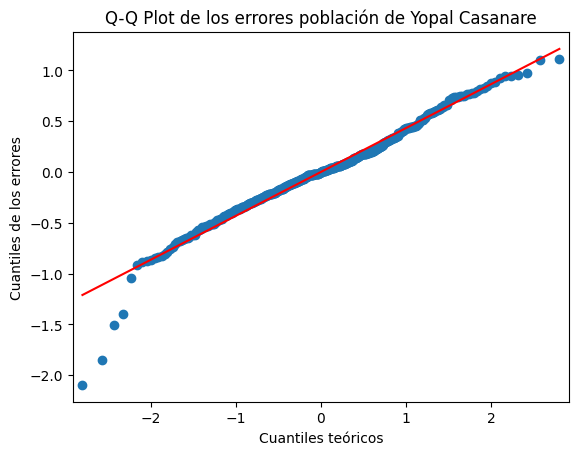

In [26]:
# obtener los errores o residuos
pred = model.predict(X)  # realizar predicciones
real = y
residuos = real - pred

# Crear el gráfico Q-Q plot de los errores
sm.qqplot(residuos, line='s')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los errores')
plt.title('Q-Q Plot de los errores población de Yopal Casanare')
plt.show()



Se puede apreciar que los puntos se encuentran junto a la línea de normalidad, no obstante,algunos puntos<br>
se encuentran ligeramente alejados de la diagonal, por lo cual no se puede apreciar claramente si el supuesto<br>
de normalidad se cumple, a continuación, dispondrá evaluar el supuesto mediante la gráfica de distribución<br>
normal Gaussiana.

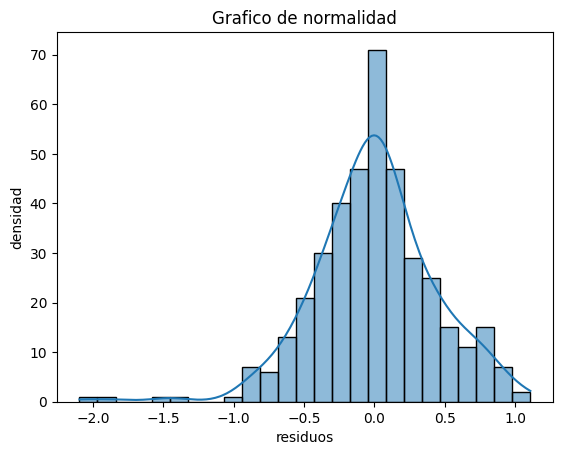

In [27]:
# Trazar un histograma con Seaborn
sns.histplot(residuos , bins='auto', kde=True)

plt.xlabel('residuos')
plt.ylabel('densidad')
plt.title('Grafico de normalidad')
plt.show()

En el gráfico de normalidad, se puede puede observar una distribución con tendencia leptocúrtica, no obstante,<br>
según (Beaver et al., 2006), el teorema de límite central se puede expresar como ∑𝑥𝑖, que, cuando 𝑛 se hace grande,<br>
también tiene una distribución aproximadamente normal con media 𝑛 𝜇 y desviación estándar 𝛿√𝑛.  En este sentido,<br>
 la conclusión se basa en el teorema de límite central y dar por cumplido el supuesto de normalidad en el modelo.   


# Multicolinealidad

In [28]:
vif = pd.DataFrame()
vif["Variable"] = X.columns[1:]
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

# Mostrar los resultados del VIF
vif

,Variable,VIF
0,q,1.056285
1,f,1.103952
2,x1,1.481452
3,x2,1.470380
4,g,1.091783
5,w,2.396480
6,z,2.360204


Como se puede apreciar en la matriz factor de inflación de la varianza, los valores están por debajo de 10,<br>
por lo cual, se puede descartar en el modelo la presencia de multicolinealidad.


# Coeficientes de Correlación entre variables numericas

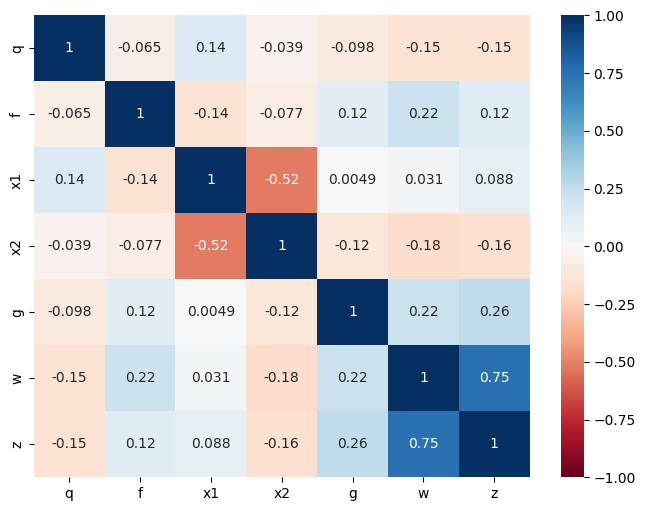

In [29]:
# quitrale la constanate a la varieble x
x = X.drop(['const'], axis= 1)

# grafica 
plt.figure(figsize=(8, 6))
sns.heatmap(
    x.corr(),
    annot= True,
    cmap = "RdBu",
    vmax= 1,
    vmin= -1)
plt.show()

Notas:<br>
Las variebles dependientes, no presentan multicolinealidad fuerte

## Heteroscedasticidad

Para evaluar este supuesto se plantea el test “studentized Breusch-Pagan” localizado en la librería de R “lmtest” el cual consiste en estimar el modelo inicial, comprobar si el modelo presenta heterocedasticidad, posteriormente calcular los errores del modelo y los determinantes de los errores mediante la incorporación de variables independientes (Roldán et al., 2016).

De manera específica el modelo se presenta de la siguiente manera:

<left>
<img src="../images/Breush-pagam.jpg" alt="metodo de Heteroscedasticidad" width="300">

In [30]:
# realizar la prueba de Bresuch-Pagan

nombres = ['estadística del multiplicador de Lagrange', 'valor p',
        'valor f', 'valor p f']

test = sms.het_breuschpagan (model.resid, model.model.exog)
lzip(nombres, test)

[('estadística del multiplicador de Lagrange', 14.924245988113583),
 ('valor p', 0.03698281362653407),
 ('valor f', 2.1712898275226755),
 ('valor p f', 0.03597397346938414)]

Los valores del test estadístico, contradicen el supuesto de homocedasticidad, dado que el P-value es menor a 0.05 rechazando<br>
la hipótesis nula $H_0$, demostrando que el modelo presenta problemas de Heteroscedasticidad, por lo que la varianza de los errores<br>
aleatorios no es constante. Para cumplir este supuesto se corregirá el modelo mediante errores robustos estandarizados.

# Variables Omitidas

In [31]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

# Realizar el test de Ramsey (RESET)
reset_test = linear_reset(model)
print("Estadístico de prueba:", reset_test)

Estadístico de prueba: <Wald test (chi2): statistic=0.4939787627935708, p-value=0.7811489881984948, df_denom=2>


c:\Users\ANTONIO\Proyects data analisys\Tesis_Yopal_PEA_Statsmodels\venv_yopal\Lib\site-packages\statsmodels\stats\diagnostic.py:1065: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


Para la validación del modelo de regresión lineal múltiple se utilizó el test de Ramsey, el cual propone el siguiente supuesto:
Formula que las variables independientes no están correlacionadas con el término del error.

$cov(x,ε)=(x ε )=0$ 

Donde:

$H_o$ El modelo no presenta problemas de variables omitidas  
$H_a$ = El modelo presenta problemas de variables omitidas   


Dado su $P-value$ no se rechaza la hipótesis nula, cumpliendo el supuesto de variables omitidas, por lo tanto, se puede afirmar estadísticamente que los estimadores de los parámetros  $\hat{\beta_0}$  son insesgados y eficientes. Demostrando que no existen omisiones de variables importantes o problemas de simultaneidad.


# Estimación del Modelo Mediante Errores Estándares Robustos

In [32]:
# Ajustar el modelo de MCO con errores estándares robustos
model = sm.OLS(y, X)
model_robust = model.fit(cov_type='HC3')

# Imprimir los resultados
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                   y_ln   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     36.69
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           3.39e-39
Time:                        11:00:40   Log-Likelihood:                -227.15
No. Observations:                 391   AIC:                             470.3
Df Residuals:                     383   BIC:                             502.1
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1062      0.102    138.340      0.0

Como se puede apreciar en la tabla anterior, una vez corregido el modelo mediante el método de errores estándar robustos,<br>
se explica que ahora la experiencia ya no es significativa al $95%$ dado que su $P-Value$ es mayor a $0.05$, no obstante, sigue<br>
siendo significativa al $90$ y se toma por ser congruente con la teoría. Una vez corregido el supuesto de homocedasticidad,<br>
se evalúan las variables omitidas.

# Interpretación de resultados 	

Se seleciona el modelo 3, el cual fue estimado Mediante Errores Estándares Robustos

el cual presenta la seguinete ecuación:

### Modelo econométrico

$$ Ln(Y)= \hat{\beta_0}+ \hat{\beta}_1Q+ \hat{\beta}_2F+ \hat{\beta}_3X_1+ \hat{\beta}_4X_2+ \hat{\beta}_5G+ \hat{\beta_6}W+ \hat{\beta_7}Z + \epsilon_t $$

### Modelo muestral

$$\hat{YLn}= {\beta_0}+ \hat{\beta}_1Q+ {\beta}_2F+ {\beta}_3X_1+ {\beta}_4X_2+ {\beta}_5G_1+ {\beta_6}W+ {\beta_7}Z $$

La ecuación resultante del modelo calculando con errores robustos presenta los siguientes estimados:

$$\hat{YLn}= 14.106158 - 0.125724*Q +0.2490846*F -0.5176395*X_1 -0.3715330*X_2-  0.1556549*G+0.0091678*W+0.0080724*Z$$

Interpretación de resultados:

La anterior ecuación econométrica se plantea para determinar las interacciones entre las variables mencionadas<br>
en el estudio relacionadas con el ingreso de la PEA. Se aborda utilizando tres variables de tipo dummy, una variable<br>
categórica y dos variables continuas. Los resultados fueron los siguientes: <br>

* La variable nivel de escolaridad influyó positivamente en los salarios de la PEA ocupada de Yopal Casanare con un<br>
nivel estadístico del $95%$ de confianza para el año 2021, considerando que, respecto a u sujeto con educación profesional,<br>
un técnico o tecnóloga gana un $37%$ menos y a su vez un individuo sin educación profesional o técnica percibe un 51% menos<br>
que un profesional.<br>

* Se encontró que en promedio el género masculino percibe un 15% más de ingresos respecto al femenino.<br>

* Contrariamente a lo que a priori se podría esperar, el hecho de tener recomendación a la hora de adquirir un empleo, influye<br>
en un $12,5%$ de forma negativa, esto porque, al evaluar a un candidato para un cargo de alto nivel, esta variable es tomada en<br>
cuenta en menor medida.

* La variable escolaridad obtenida fuera del departamento, afecta positivamente al ingreso en un $24%$, esto tal vez explicado por<br>
la falta de oferta académica de educación superior, tanto en posgrados como en pregrados.<br>

* Se encontró que las variables experiencia y edad presentan crecimiento lineal positivo, afectando al ingreso en $0,91%$ y $0,81%$<br>
respectivamente, por cada unidad adicional. 

## Análisis y/o Simulación de escenarios

Función de regresión múltiple:

$$\hat{YLn}= {\beta_0}+ {\beta}_1Q+ {\beta}_2F+ {\beta}_3X_1+ {\beta}_4X_2+ {\beta}_5G_1+ {\beta_6}W+ {\beta_7}Z $$

Donde:<br>

$$\hat{YLn}= 14.106158-0.125724*Q+ 0.2490846*F -0.5176395*X_1 -0.3715330*X_2-  0.1556549*G+0.0091678*W+0.0080724*Z$$
Así mismo:<br>

$$\hat{YLn}= 14.1061586-0.1257248*Q- 0.5176395*X_1-0.3715330*X_2+0.2490846*F+ 0.1556549*G+ 0.0091678*W+0.0080724*Z $$ 
$$\hat{YLn} = b$$

$$ e^(\hat{YLn})= e^b $$

$$\hat{Y} = c$$


Teniendo en cuenta la relación anterior, se calculará el ingreso promedio que un individuo puede obtener, dadas ciertas características:

* El ingreso promedio para un joven de género masculino, de alrededor de 18 años, recientemente graduado de bachiller, sin experiencia laboral y con recomendación laboral:


In [33]:
m_18 = model_robust.predict([1,1,1,1,0,1,18,0])
m_18 = math.exp(m_18[0])
print(f'El ingreso promedio es de: ${int(m_18)}')

El ingreso promedio es de: $1242397



* El ingreso promedio para un individuo de género femenino de alrededor de 18 años, recientemente graduada de bachiller, sin experiencia laboral y con recomendación laboral:

In [34]:
f_18 = model_robust.predict([1,1,1,1,0,0,18,0])
f_18 = math.exp(f_18[0])
print(f'El ingreso promedio es de: ${int(f_18)}')

El ingreso promedio es de: $1063311


* Se halla el ingreso promedio que podría obtener un individuo que presente las condiciones mayormente<br>
favorables en la ciudad de Yopal, este de género masculino, contando con 40 años de edad, profesional y con<br>
10 años de experiencia laboral:

In [35]:
m_40 = model_robust.predict([1,0,1,0,0,1,40,10])
m_40 = math.exp(m_40[0])
print(f'El ingreso promedio es de: ${int(m_40)}')

El ingreso promedio es de: $3135605


* Se halla el ingreso promedio que podría obtener un individuo que presente las condiciones mayormente
favorables en la ciudad de Yopal, en este caso de género femenino, contando con 40 años de edad, profesional
y con 10 años de experiencia:

In [36]:
m_40 = model_robust.predict([1,0,1,0,0,0,40,10])
m_40 = math.exp(m_40[0])
print(f'El ingreso promedio es de: ${int(m_40)}')

El ingreso promedio es de: $2683622


Conclusiones
Como resultado del presente estudio se encontró que la variable nivel de escolaridad, influyó positivamente<br>
en los salarios de la PEA ocupada de Yopal Casanare con un nivel estadístico del 95% de confianza para<br>
el año 2021, considerando que, respecto a u sujeto con educación profesional, un técnico o tecnóloga gana<br>
un 37% menos y a su vez un individuo sin educación profesional o técnica percibe un 51% menos que un<br>
profesional.<br><br>
Por otra parte, se concluye que, la edad del empleado junto con los años de experiencia laboral marca<br>
resultados positivos en el nivel de ingresos, esta última cuenta con un nivel de significancia del 90% y<br>
mediante inferencias se demostró que el ingreso es afectado en un 0,81% y 0,91% por cada año de edad<br>
y experiencia obtenido por el trabajador, respectivamente. En cuanto a la variable género, se encontró<br>
una diferenciación salarial de alrededor del 15% a favor del género masculino, evidenciándose una posible<br>
desventaja para el género femenino en cuanto a la remuneración se refiere, es decir, por un millón de pesos<br>
que un individuo de género masculino recibe, una mujer recibiría $850.000 aproximadamente.


Adicionalmente se logró determinar que el canal de búsqueda o recomendación presenta un impacto negativo<br>
del 12,5% sobre el salario de la PEA ocupada en Yopal, esto con un nivel de significancia estadística del 95%,<br>
lo que explica que, por un millón de pesos que reciba cualquier individuo sin recomendación, un individuo<br>
diferente con recomendación y las mismas características - ceteris paribus - obtendrá $875.000.


Finalmente, se estimó que la escolaridad obtenida por fuera del departamento, influyó un 24,9% positivamente <br>
en los salarios de la PEA, lo que significa, por un millón de pesos que gana un individuo que obtuvo todos <br>
sus estudios dentro del departamento, otro individuo con las mismas características, pero que realizó sus <br>
estudios por fuera del departamento ganaría $1´250.000.

# Save Model

In [37]:
# Guardar modelo para posteriormente hacer MLOps (Machine Learning Operations.)

model_path = "../models/model_OLS" # Ruta de guardado

# Guardar el modelo
with open(model_path, 'wb') as file:
    pickle.dump(model_robust, file)

print(f"Modelo guardado en: {model_path}") # Mostrar ruta donde se guardo

Modelo guardado en: ../models/model_OLS


In [38]:
# Cargamos el modelo
with open(model_path, 'rb') as file:
    model_robust = pickle.load(file)

print("Modelo cargado exitosamente")

Modelo cargado exitosamente
